# Analiza zmieniajƒÖcych siƒô nastroj√≥w i opinii dotyczƒÖcych matury w latach 2021, 2022 i 2023 na podstawie danych z Twittera.

### Matura, bƒôdƒÖca egzaminem ko≈Ñcowym w systemie edukacji, odgrywa kluczowƒÖ rolƒô w ≈ºyciu uczni√≥w na ca≈Çym ≈õwiecie. Ka≈ºdego roku tysiƒÖce uczni√≥w poddaje siƒô temu wa≈ºnemu testowi, kt√≥ry mo≈ºe mieƒá znaczƒÖcy wp≈Çyw na ich przysz≈Ço≈õƒá edukacyjnƒÖ i zawodowƒÖ.
### Celem tej pracy jest przeanalizowanie nastroj√≥w i opinii u≈ºytkownik√≥w Twittera na temat matury w latach 2021, 2022 i 2023. Twitter jest popularnƒÖ platformƒÖ spo≈Çeczno≈õciowƒÖ, na kt√≥rej ludzie publicznie wyra≈ºajƒÖ swoje my≈õli, emocje i opinie na r√≥≈ºnorodne tematy. Wykorzystanie danych z Twittera umo≈ºliwi nam zrozumienie zmieniajƒÖcych siƒô tendencji i trend√≥w zwiƒÖzanych z maturƒÖ na przestrzeni tych trzech lat.

    SCRAPPOWANIE DANYCH

W celu zbierania danych dotyczƒÖcych matury, wybra≈Çem hashtag #matura, #matura2021, itd. Hashtagi sƒÖ popularnym narzƒôdziem na Twitterze, kt√≥re s≈Çu≈ºƒÖ do kategoryzowania i oznaczania tre≈õci zwiƒÖzanych z danym tematem. Wykorzystanie podanych hashtag√≥w pozwoli nam zebraƒá tweety, kt√≥re bezpo≈õrednio odnoszƒÖ siƒô do egzaminu maturalnego.

[program do pobierania tweet√≥w (scraper)](Scraper.ipynb)

    PREPROCESSING

#### tokenizacja
Tokenizacja:
Tokenizacja jest procesem podzia≈Çu tekstu na mniejsze jednostki zwane tokenami. Tokeny mogƒÖ byƒá pojedynczymi s≈Çowami, znakami interpunkcyjnymi, fragmentami zdania itp. Tokenizacja jest wa≈ºnym krokiem w analizie tekstu, poniewa≈º pozwala na dalsze przetwarzanie i analizƒô tekstu na poziomie jednostek. Na przyk≈Çad zdanie "To jest przyk≈Çad tokenizacji." mo≈ºe zostaƒá podzielone na tokeny: ["To", "jest", "przyk≈Çad", "tokenizacji", "."].


#### lematyzacja
Lematyzacja to proces redukcji s≈Ç√≥w do ich podstawowej formy, zwanej lematem. Lemat to forma s≈Çowa, kt√≥ra reprezentuje og√≥lnƒÖ bazowƒÖ formƒô s≈Çowa. Na przyk≈Çad lematem s≈Çowa "biega≈Ç", "bieganie" i "biega≈Çem" jest "biegaƒá". Lematyzacja ma na celu sprowadzenie r√≥≈ºnych form s≈Çowa do jednej kanonicznej formy, co u≈Çatwia analizƒô tekstu, poniewa≈º s≈Çowa o podobnym znaczeniu sƒÖ traktowane jako jednostki. Lematyzacja mo≈ºe byƒá realizowana za pomocƒÖ regu≈Ç lingwistycznych lub za pomocƒÖ zaawansowanych narzƒôdzi do przetwarzania jƒôzyka naturalnego (NLP)

#### stopwords
Stopwords to czƒôsto wystƒôpujƒÖce s≈Çowa, kt√≥re nie niosƒÖ du≈ºo znaczenia w analizie tekstu, takie jak "a", "i", "w", "na", "z". Zwykle sƒÖ to powszechne s≈Çowa funkcyjne, kt√≥re nie wniosƒÖ wiele informacji semantycznej. W celu usuniƒôcia stopwords, mo≈ºemy skorzystaƒá z gotowych list takich s≈Ç√≥w lub wykorzystaƒá biblioteki do analizy tekstu, kt√≥re oferujƒÖ takƒÖ funkcjonalno≈õƒá. Usuniƒôcie stopwords pozwala skoncentrowaƒá siƒô na bardziej znaczƒÖcych s≈Çowach w analizowanym tek≈õcie.

In [45]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
import spacy
nlp = spacy.load("pl_core_news_sm")
import pl_core_news_sm
nlp = pl_core_news_sm.load()

In [47]:
m1 = json.load(open('matura21.json', 'r'))
m2 = json.load(open('matura22.json', 'r'))
m3 = json.load(open('matura23.json', 'r'))

In [48]:
extended_stop_words = [" ","  ","   ",".", ",", ":", ";", "?", "!", "'", "‚Äô", "@", "n't", "(", ")", "#", "[", "]", "‚Ä¶", "...", "*", "'m", "'re", "'s", "'ve", "``", "''", "'ll", '"', "&", "|", "-", "‚Äù", "‚Äû", "‚Äú", "„Äù"]
def process_text(sentence):
    # Tokenizacja
    doc = nlp(sentence)
    # Lematyzacja i stopwords
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    # dodatkowe stopwords
    lemmas_filtered = [token for token in lemmas if token.lower() not in extended_stop_words]
    
    return lemmas_filtered

In [49]:
for tweet in m1:
    tweet['processed'] = process_text(tweet['content'])
for tweet in m2:
    tweet['processed'] = process_text(tweet['content'])
for tweet in m3:
    tweet['processed'] = process_text(tweet['content'])


    DODANIE P√ìL Z OCENƒÑ EMOCJI

In [55]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karolstudniarek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karolstudniarek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/karolstudniarek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
# ≈Çadne funkcje od Maƒáka S≈Çadkiewicza :)
def vaderScore(tweets):
    vader = SentimentIntensityAnalyzer()
    arr = []
    for tweet in tweets:
        score = vader.polarity_scores(tweet["content"])
        tweet["vader_score"] = score
        arr.append(tweet)
    return arr


def text2emotionScore(tweets):
    arr = []
    for tweet in tweets:
        score = te.get_emotion(tweet["content"])
        tweet["t2e_score"] = score
        arr.append(tweet)
    return arr

In [57]:
vaderScore(m1)
vaderScore(m2)
vaderScore(m3)

text2emotionScore(m1)
text2emotionScore(m2)
text2emotionScore(m3)

[{'date': '2023-05-23, 18:56:40',
  'id': 1661083743375769606,
  'content': 'Ustny angielski zdany na 100% A wam jak posz≈Ço ? üòâ#matura2023',
  'processed': ['Ustny',
   'angielski',
   'zdaƒá',
   '100',
   '%',
   'posz≈Ço',
   'üòâ',
   'matura2023'],
  'vader_score': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  't2e_score': {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}},
 {'date': '2023-05-23, 18:51:57',
  'id': 1661082554819067918,
  'content': 'ko≈Ñcem ≈õwiata mia≈Ça byƒá matura, puste konto w banku, jestem tak wysoko, a mniej by≈Ço wzlot√≥w ni≈º upadk√≥w',
  'processed': ['koniec',
   '≈õwiat',
   'mieƒá',
   'matura',
   'pusty',
   'konto',
   'bank',
   'wysoko',
   'mniej',
   'wzlot',
   'upadek'],
  'vader_score': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  't2e_score': {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}},
 {'date': '2023-05-23, 18:42:16',
  'id': 1661080121451720705,
  'content': 'czy kto≈õ jest na 2 ro

In [58]:
json_m1 = json.dumps(m1)
file = open("matura21.json", "w")
file.write(json_m1)
file.close()

json_m2 = json.dumps(m2)
file = open("matura22.json", "w")
file.write(json_m2)
file.close()

json_m3 = json.dumps(m3)
file = open("matura23.json", "w")
file.write(json_m3)
file.close()

    WORDCLOUDY

In [61]:
m1_tweets = []
m2_tweets = []
m3_tweets = []

for tweet in m1:
    for word in tweet['processed']:
        m1_tweets.append(word)
for tweet in m2:
    for word in tweet['processed']:
        m2_tweets.append(word)
for tweet in m3:
    for word in tweet['processed']:
        m3_tweets.append(word)
        
m1_tweets = nltk.FreqDist(m1_tweets)
m2_tweets = nltk.FreqDist(m2_tweets)
m3_tweets = nltk.FreqDist(m3_tweets)


In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

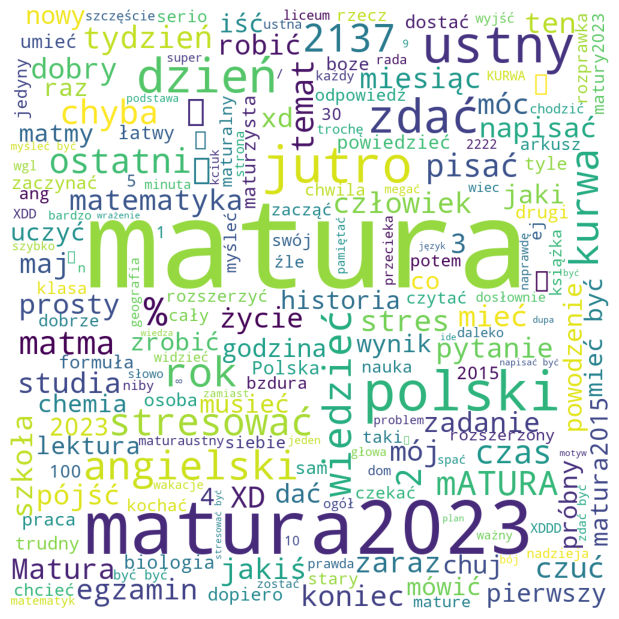

In [71]:

word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate_from_frequencies(m1_tweets)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

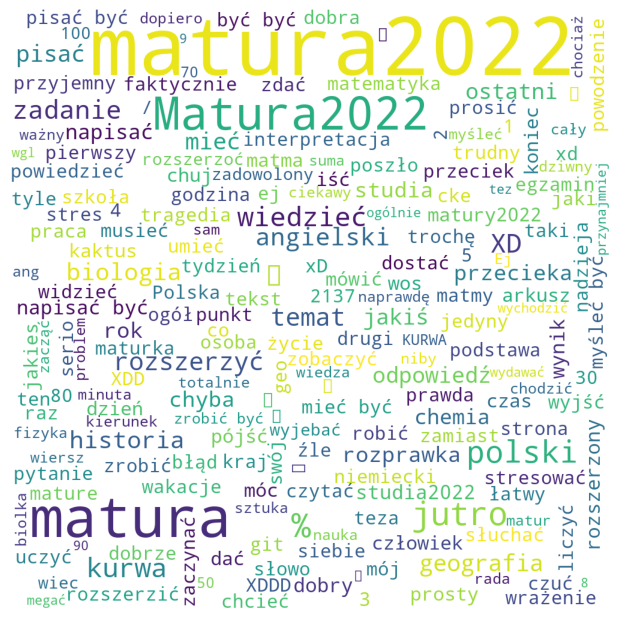

In [72]:
word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate_from_frequencies(m2_tweets)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

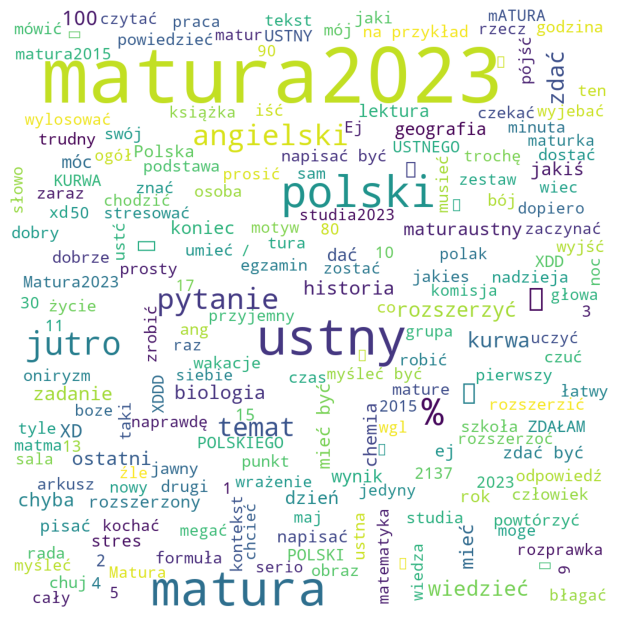

In [73]:
word_cloud = WordCloud(width=1000, height=1000,
                       background_color='white', min_font_size=10).generate_from_frequencies(m3_tweets)

plt.figure(figsize=(6,6), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

    PODZIA≈Å NA POZYTYWNE I NEGATYWNE

In [82]:
m1_positives = []
m1_negatives = []
m1_neutrals = []

m2_positives = []
m2_negatives = []
m2_neutrals = []

m3_positives = []
m3_negatives = []
m3_neutrals = []

for tweet in m1:
    if tweet['vader_score']['compound'] >= 0.05:
        m1_positives.append(tweet)
    elif tweet['vader_score']['compound'] <= -0.05:
        m1_negatives.append(tweet)
    else:
        m1_neutrals.append(tweet)
        
for tweet in m2:
    if tweet['vader_score']['compound'] >= 0.05:
        m2_positives.append(tweet)
    elif tweet['vader_score']['compound'] <= -0.05:
        m2_negatives.append(tweet)
    else:
        m2_neutrals.append(tweet)
        
for tweet in m3:
    if tweet['vader_score']['compound'] >= 0.05:
        m3_positives.append(tweet)
    elif tweet['vader_score']['compound'] <= -0.05:
        m3_negatives.append(tweet)
    else:
        m3_neutrals.append(tweet)
        

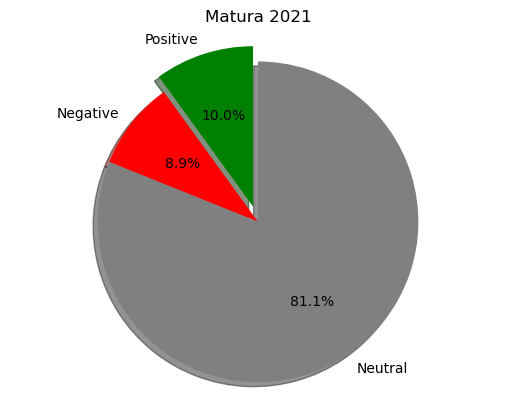

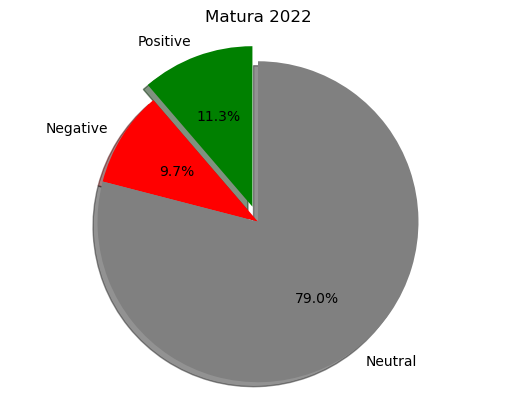

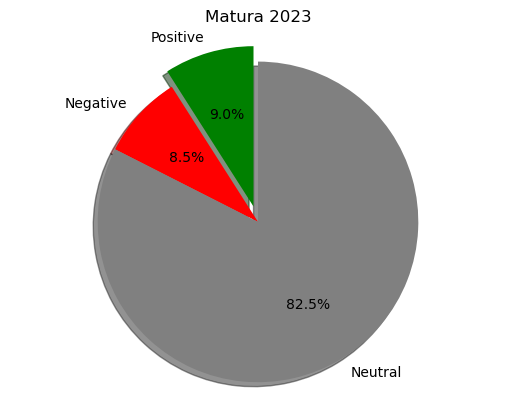

In [89]:
# m1
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(m1_positives), len(m1_negatives), len(m1_neutrals)]
colors = ['green', 'red', 'grey']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Matura 2021')
plt.show()

# m2
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(m2_positives), len(m2_negatives), len(m2_neutrals)]
colors = ['green', 'red', 'grey']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Matura 2022')
plt.show()

# m3
labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(m3_positives), len(m3_negatives), len(m3_neutrals)]
colors = ['green', 'red', 'grey']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Matura 2023')
plt.show()

